In [39]:
import timm
from torchsummary import summary
from torchvision import models
import torch
from importlib import reload

In [2]:
base_model = timm.create_model(
            "tf_efficientnet_b4_ns", pretrained=True, num_classes=1
        )
summary(base_model, (3,299,299), device='cpu')

-----------------------------------------------------------------------------------------------
Layer (type:depth-idx)                        Output Shape              Param #
├─Conv2dSame: 1-1                             [-1, 48, 150, 150]        1,296
├─BatchNorm2d: 1-2                            [-1, 48, 150, 150]        96
├─SwishMe: 1-3                                [-1, 48, 150, 150]        --
├─Sequential: 1-4                             [-1, 448, 10, 10]         --
|    └─Sequential: 2-1                        [-1, 24, 150, 150]        --
|    |    └─DepthwiseSeparableConv: 3-1       [-1, 24, 150, 150]        2,940
|    |    └─DepthwiseSeparableConv: 3-2       [-1, 24, 150, 150]        1,206
|    └─Sequential: 2-2                        [-1, 32, 75, 75]          --
|    |    └─InvertedResidual: 3-3             [-1, 32, 75, 75]          11,878
|    |    └─InvertedResidual: 3-4             [-1, 32, 75, 75]          18,120
|    |    └─InvertedResidual: 3-5             [-1, 32, 75

-----------------------------------------------------------------------------------------------
Layer (type:depth-idx)                        Output Shape              Param #
├─Conv2dSame: 1-1                             [-1, 48, 150, 150]        1,296
├─BatchNorm2d: 1-2                            [-1, 48, 150, 150]        96
├─SwishMe: 1-3                                [-1, 48, 150, 150]        --
├─Sequential: 1-4                             [-1, 448, 10, 10]         --
|    └─Sequential: 2-1                        [-1, 24, 150, 150]        --
|    |    └─DepthwiseSeparableConv: 3-1       [-1, 24, 150, 150]        2,940
|    |    └─DepthwiseSeparableConv: 3-2       [-1, 24, 150, 150]        1,206
|    └─Sequential: 2-2                        [-1, 32, 75, 75]          --
|    |    └─InvertedResidual: 3-3             [-1, 32, 75, 75]          11,878
|    |    └─InvertedResidual: 3-4             [-1, 32, 75, 75]          18,120
|    |    └─InvertedResidual: 3-5             [-1, 32, 75

In [3]:
print(base_model)

EfficientNet(
  (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SwishMe()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SwishMe()
        (se): SqueezeExcite(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SwishMe()
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
     

In [4]:
out1 = base_model.forward_features(torch.randn((4,3,224,224)))
out1.size()

torch.Size([4, 1792, 7, 7])

In [33]:
z = out1.view(1,-1,7,7)
z.size()

torch.Size([1, 7168, 7, 7])

In [58]:
out2 = base_model.forward_features(torch.randn((1,3,299,299)))
out2.size()

torch.Size([1, 1792, 10, 10])

In [36]:
res = torch.cat([z,out2], 1)
res.size()

torch.Size([1, 8960, 7, 7])

In [56]:
import classifier
reload(classifier)

<module 'classifier' from 'g:\\casia_server\\classifier.py'>

In [57]:
from classifier import ClassifierBlock

classifier = ClassifierBlock(8960)
out = classifier(res)
out.size()

torch.Size([1, 1])

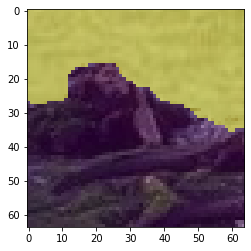

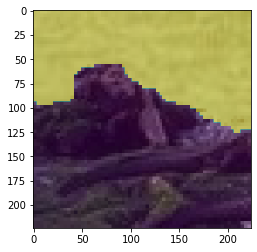

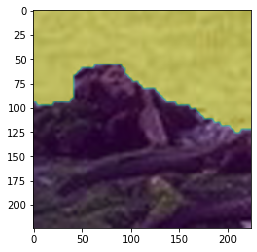

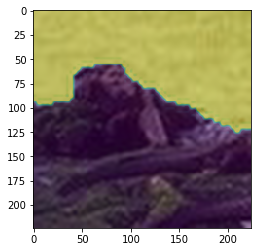

In [64]:
import cv2
import matplotlib.pyplot as plt 

img = cv2.imread('G:\\Image_Manipulation_Dataset\\CASIA_2.0\\image_patch_64\\Tp_D_CND_M_N_ani00018_sec00096_00138\\0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
msk = cv2.imread('G:\\Image_Manipulation_Dataset\\CASIA_2.0\\image_patch_64\\Tp_D_CND_M_N_ani00018_sec00096_00138\\0_gt.png', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img)
plt.imshow(msk, alpha=0.5)
plt.show()

img1 = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
msk1 = cv2.resize(msk, (224,224), interpolation=cv2.INTER_AREA)
plt.figure()
plt.imshow(img1)
plt.imshow(msk1, alpha=0.5)
plt.show()

img2 = cv2.resize(img, (224,224), interpolation=cv2.INTER_CUBIC)
msk2 = cv2.resize(msk, (224,224), interpolation=cv2.INTER_CUBIC)
plt.figure()
plt.imshow(img2)
plt.imshow(msk2, alpha=0.5)
plt.show()

img3 = cv2.resize(img, (224,224), interpolation=cv2.INTER_LANCZOS4)
msk3 = cv2.resize(msk, (224,224), interpolation=cv2.INTER_LANCZOS4)
plt.figure()
plt.imshow(img3)
plt.imshow(msk3, alpha=0.5)
plt.show()